## Imports 

In [1]:
# imports - matploltib, pandas, NumPy
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# imports - plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from IPython.display import HTML

from plotly.offline import iplot
import plotly as py
import cufflinks as cf

py.offline.init_notebook_mode(connected=True)
cf.go_offline()


***
## Load and preparing dataset

In [4]:
df = pd.read_csv('Summer-Olympic-medals-1976-to-2008.csv', encoding='latin-1')
df.head(3)

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,"KHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15316 entries, 0 to 15315
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          15316 non-null  object
 1   Year          15316 non-null  int64 
 2   Sport         15316 non-null  object
 3   Discipline    15316 non-null  object
 4   Event         15316 non-null  object
 5   Athlete       15316 non-null  object
 6   Gender        15316 non-null  object
 7   Country_Code  15316 non-null  object
 8   Country       15316 non-null  object
 9   Event_gender  15316 non-null  object
 10  Medal         15316 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.3+ MB


**We can already identify that all of our data is categorical data.**

In [6]:
df.isnull().sum()

City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Event_gender    0
Medal           0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(keep='first',inplace=True,)

***

THEME


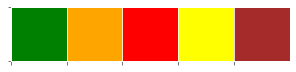

In [9]:
#Lets set the style of all our seaborn based plots
plt.style.use(['ggplot'])
# Setting the theme of our plots
theme = ["green", "orange","red","yellow","brown"]
print('THEME')
sns.palplot(sns.color_palette(theme))
palette= sns.set_palette(sns.color_palette(theme))

### Examine our categorical description

In [10]:
categorical = df.drop(['Year'], axis = 1)

In [11]:
categorical.describe().style.set_properties(**{'background-color': '#DEF5E5',
                                    'color': 'black',
                                    'border': '0.5px  solid black'})

,City,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
count,15315,15315,15315,15315,15315,15315,15315,15315,15315,15315
unique,9,28,41,293,11338,2,128,127,3,3
top,Beijing,Aquatics,Athletics,hockey,"PHELPS, Michael",Men,USA,United States,M,Bronze
freq,2042,2210,1523,816,16,9387,1992,1992,8816,5258


* This chart is very useful to identfiy very easily the distibution for example between number of countries and number of the total athletes.

***

### Another check for most frequent countries

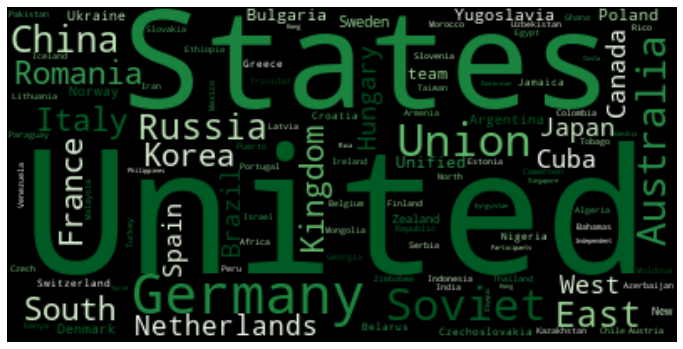

In [12]:
countries = " ".join(n for n in df['Country'])
from wordcloud import WordCloud
plt.figure(figsize=(12, 11))
wc = WordCloud(background_color='black',colormap='Greens',collocations=False).generate(countries)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show() 

***
Lets also check for the distibu

***

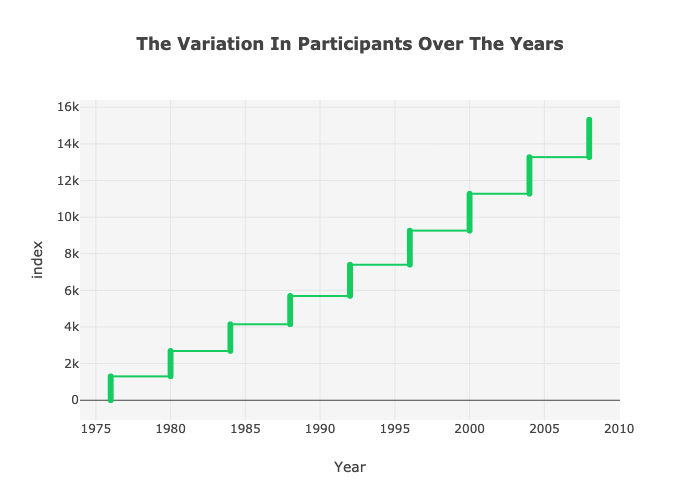

In [13]:
line_colors=[ "#14cc60","#036d19","#09a129"]
fig= px.line(df,x='Year',title="<b>The Variation In Participants Over The Years</b>",
             markers=True,color_discrete_sequence=line_colors,template = "none")
fig.update_layout(plot_bgcolor = " whitesmoke")
# fig.show() # -> to display the full interactive plot
fig.show("png") # -> to display the plot in github 

We can defintly see an increase in number of atheltes as we go throuh the years.<br>
The reason for that by my assumption, is due to the fact that more and more fields of sport entered the olympics.

Lets check my assumption from above

In [14]:
# df['Sport'].unique()

In [15]:
fields = df.groupby('Year').apply(lambda x: x.Sport.nunique()).reset_index()
# fields

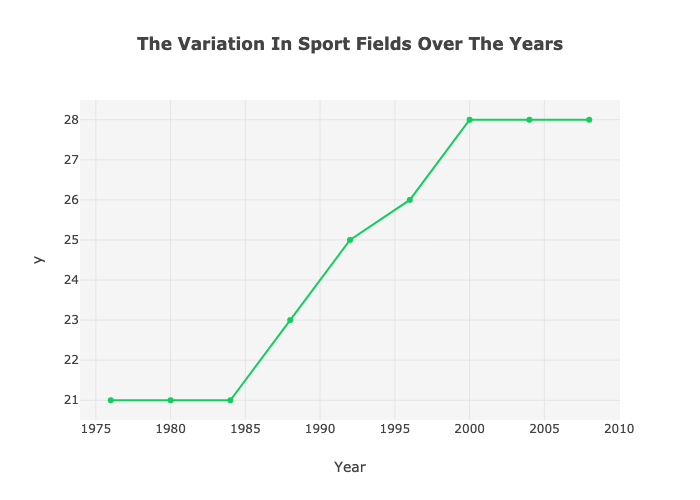

In [16]:
line_colors=[ "#14cc60","#036d19","#09a129"]
fig= px.line(fields,x='Year', y =fields.iloc[:,1] ,title="<b>The Variation In Sport Fields Over The Years</b>",
             markers=True,color_discrete_sequence=line_colors,template = "none")
fig.update_layout(plot_bgcolor = " whitesmoke")
# fig.show() # -> to display the full interactive plot
fig.show("png") # -> to display the plot in github 

We can see a big increase over the years, but we will also check the number of countries joining over the years

In [17]:
countries = df.groupby('Year').apply(lambda x: x.Country.nunique()).reset_index()
# countries

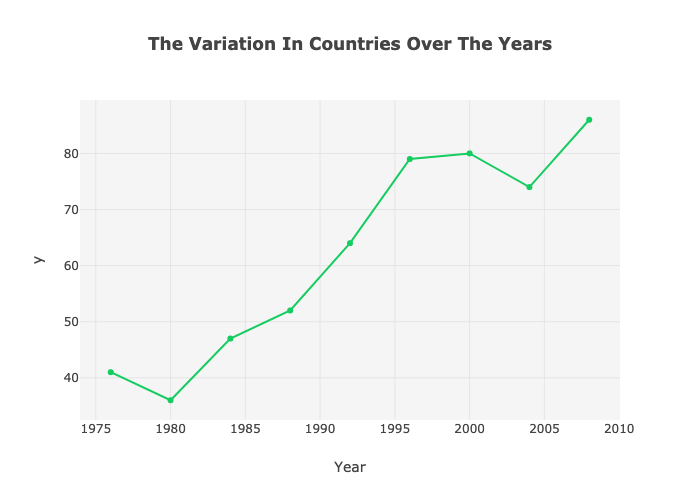

In [18]:
line_colors=[ "#14cc60","#036d19","#09a129"]
fig= px.line(countries,x='Year', y =countries.iloc[:,1] ,title="<b>The Variation In Countries Over The Years</b>",
             markers=True,color_discrete_sequence=line_colors,template = "none")
fig.update_layout(plot_bgcolor = " whitesmoke")
# fig.show() # -> to display the full interactive plot
fig.show("png") # -> to display the plot in github 

***
## Diff between Genders


Lets see the difference over the years between the genders

In [19]:
df['Gender'].unique()

array(['Women', 'Men'], dtype=object)

In [20]:
males = df[df['Gender'] == 'Men'].groupby('Year')['Gender'].count().reset_index().rename(columns={
    "Gender":"Male"
})
femals = df[df['Gender'] == 'Women'].groupby('Year')['Gender'].count().reset_index().rename(columns={
    "Gender":"Woman"
})

In [21]:
femals['Male'] = males['Male']
# femals

In [22]:
def diff(male, woman):
    if male > woman:
        return (male-woman) / (male + woman)
    else:
        return (woman - male) / (male + woman)

In [23]:
femals['Diff%'] = femals.apply(lambda row: diff(row['Male'], row['Woman']), axis= 1)
# femals

In [24]:
subfig = make_subplots(specs=[[{"secondary_y": True}]])
fig1 = px.histogram(data_frame=df, x='Year', color='Gender')
fig2 = px.line(data_frame=femals, x='Year', y='Diff%')

fig2.update_traces(yaxis="y2")
fig2.update_traces(line_color='#2B3451', line_width=3)
subfig.add_traces(fig1.data + fig2.data)

subfig.show()

We can see the improvement over the years in the ratio between Women and Men in the olympics participants

***
### Difference in genders between fields

In [25]:
males_1 = df[df['Gender'] == 'Men'].groupby('Sport')['Gender'].count().reset_index().rename(columns={
    "Gender":"Male"
})
femals_1 = df[df['Gender'] == 'Women'].groupby('Sport')['Gender'].count().reset_index().rename(columns={
    "Gender":"Woman"
})

In [26]:
femals_1['Male'] = males_1['Male']
# femals_1

In [27]:
femals_1['Diff%'] = femals_1.apply(lambda row: diff(row['Male'], row['Woman']), axis= 1)
femals_1 = femals_1.sort_values(by=['Diff%'])
# femals_1

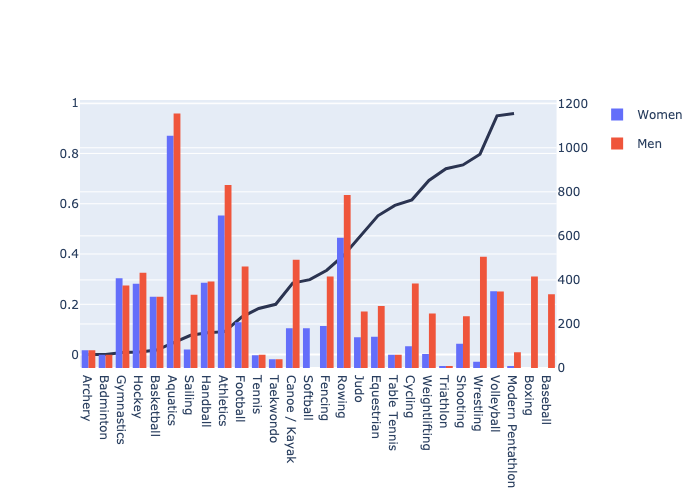

In [28]:
subfig = make_subplots(specs=[[{"secondary_y": True}]])
fig1 = px.line(data_frame=femals_1, x='Sport', y='Diff%')
fig2 = px.histogram(data_frame=df, x='Sport', color='Gender')

fig2.update_traces(yaxis='y2')
fig1.update_traces(line_color='#2B3451', line_width=3)
subfig.add_traces(fig1.data + fig2.data)

# subfig.show() # -> to display the full interactive plot
subfig.show("png") # -> to display the plot in github 

***
### Different approach

This approach will helps to visualize in much more details the distribution of the medals

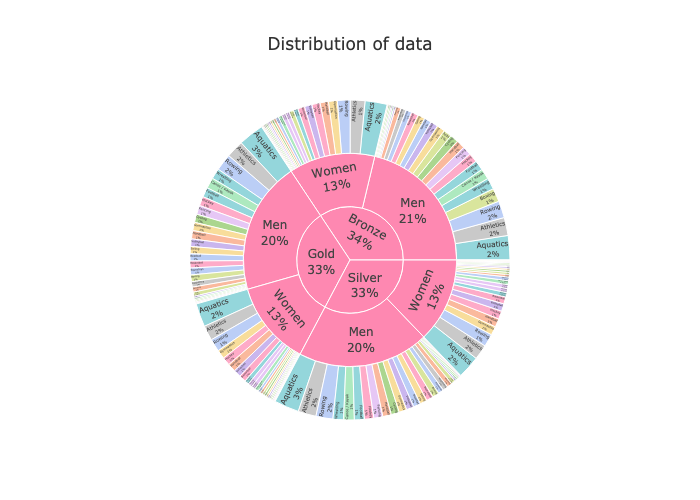

In [29]:
fig = px.sunburst(
    data_frame=df,
    path=['Medal', 'Gender', 'Sport'],  # Root, branches, leaves
    color="Sport",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    # maxdepth=-1,                        # set the sectors rendered. -1 will render all levels in the hierarchy
    # color_continuous_scale=px.colors.sequential.BuGn,
    # range_color=[10,100],

    # branchvalues="total",               # or 'remainder'
    title="Distribution of data",
    template='ggplot2',               # 'ggplot2', 'seaborn', 'simple_white', 'plotly',
    #                                   # 'plotly_white', 'plotly_dark', 'presentation',
    #                                   # 'xgridoff', 'ygridoff', 'gridon', 'none'
)

fig.update_traces(textinfo='label+percent entry')
# fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

# fig.show() # -> to display the full interactive plot
fig.show("png") # -> to display the plot in github 

***
Lets sum this EDA with medalists as individuals and countries

In [30]:
top_15_ind = df.groupby('Athlete')['Medal'].count().reset_index()
top_15_country = df[df['Medal'] == 'Gold'].groupby('Country')['Medal'].count().reset_index()
top_15_sport = df[df['Medal'] == 'Gold'].groupby('Sport')['Medal'].count().reset_index()

# top_15_ind/ort_values(by=['Medal'], ascending=False).head(15)

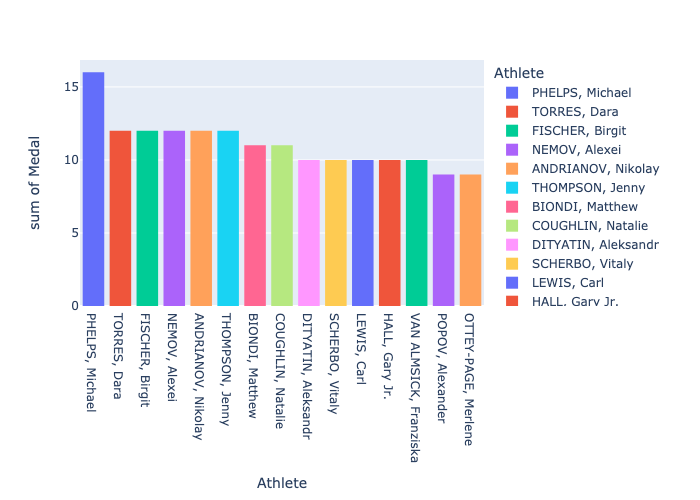

In [31]:
fig = px.histogram(data_frame=top_15_ind.sort_values(by=['Medal'], ascending=False).head(15), x='Athlete', y='Medal',
                  color='Athlete')
# fig.show() # -> to display the full interactive plot
fig.show("png") # -> to display the plot in github 

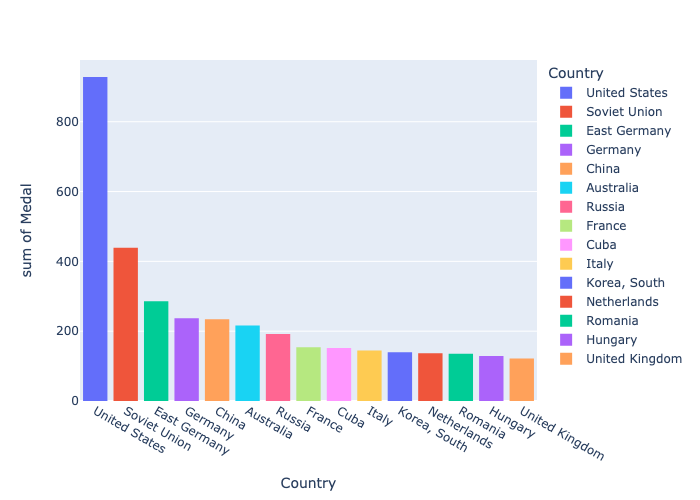

In [32]:
fig = px.histogram(data_frame=top_15_country.sort_values(by=['Medal'], ascending=False).head(15), x='Country',
                   y='Medal',
                  color='Country')
# fig.show() # -> to display the full interactive plot
fig.show("png") # -> to display the plot in github 

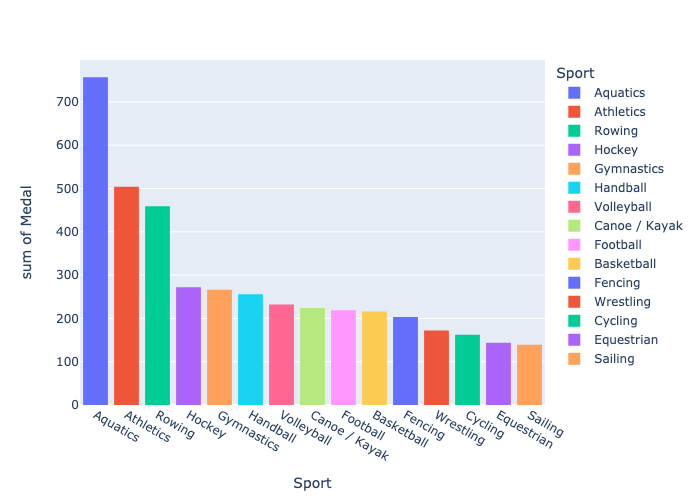

In [33]:
fig = px.histogram(data_frame=top_15_sport.sort_values(by=['Medal'], ascending=False).head(15), x='Sport',
                   y='Medal',
                  color='Sport')
# fig.show() # -> to display the full interactive plot
fig.show("png") # -> to display the plot in github 